Training Algorithm:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Storing all the data<br>
Prediction Algorithm:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.Calculate the distance from x to all points in your data<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.Sort the points in your data by increasing the distance from x<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.Predict the majority label of "k" closest points<br>

Choosing a k will affect to what class a new point is assigned to<br>
Choosing large values of k will reduce the noise and a more cleaner cutoff

PROS:<br>
1.Very Simple<br>
2.Training is trivial<br>
3.Works with any number of classes<br>
4.Easy to add more data<br>
5.Few parameters:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;K<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Distance Metric

CONS:<br>
1.High prediction cost(worst for large data sets)<br>
2.Not good for high dimensional data<br>
3.Categorical data won't work well  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv('Classified Data',index_col=0)

In [10]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Since the KNN algorithm predicts the class of a test observation depending the the class of nearest observation,scale of the variables is important so standardise evrything to the same scale

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [15]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [17]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [18]:
df.columns[:-1]

Index([u'WTT', u'PTI', u'EQW', u'SBI', u'LQE', u'QWG', u'FDJ', u'PJF', u'HQE',
       u'NXJ'],
      dtype='object')

In [19]:
df_fea=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [20]:
df_fea.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [21]:
from sklearn.cross_validation import train_test_split

In [29]:
X=df_fea
Y=df['TARGET CLASS']
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=101)

Should choose a appropriate K value using elbow method

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=1)   #n_neighbors = number of neighbors to be considered which is nothing but K value

In [32]:
knn.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
pred=knn.predict(test_X)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(test_Y,pred))
print(classification_report(test_Y,pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



**Elbow Method**

In [37]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X,train_Y)
    pred=knn.predict(test_X)
    error_rate.append(np.mean(pred!=test_Y))

In [38]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

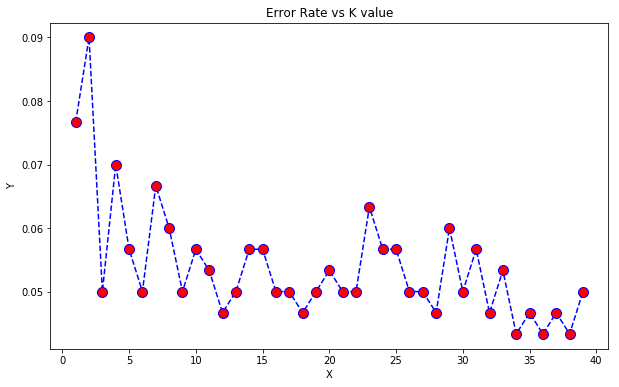

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('X')
plt.ylabel('Y')

In [46]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(train_X,train_Y)
pred=knn.predict(test_X)
print(confusion_matrix(test_Y,pred))
print('\n')
print(classification_report(test_Y,pred))

[[153   6]
 [  7 134]]


             precision    recall  f1-score   support

          0       0.96      0.96      0.96       159
          1       0.96      0.95      0.95       141

avg / total       0.96      0.96      0.96       300

